In [ ]:
!pip install git+https://github.com/shizuo-kaji/CubicalRipser_3dim
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/shizuo-kaji/CubicalRipser_3dim to /tmp/pip-req-build-qtfd5cb5
  Running command git clone -q https://github.com/shizuo-kaji/CubicalRipser_3dim /tmp/pip-req-build-qtfd5cb5
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cripser: filename=cripser-0.0.8-cp37-cp37m-linux_x86_64.whl size=138456 sha256=23abdf41b312f8fe8b6381f7203fb0f68e12a2ab12e63a4d58288779ba70d143
  Stored in directory: /tmp/pip-ephem-wheel-cache-8c4vpgi3/wheels/7b/8e/b1/bf858a2c6c9b80f3f55e1840fc7752c8dd982ab48f6b337df7
Successfully built cripser
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cripser
import gudhi
from gudhi import representations
import numpy as np
import math
import pandas as pad
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import os
import numpy as np
# from tensorflow.keras.applications import ResNet50

In [ ]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [ ]:
!mkdir ph_full_data_segmented
!mkdir ph_full_data_segmented/moderate
!mkdir ph_full_data_segmented/severe
!mkdir ph_full_data_segmented/mild

In [ ]:
def calculate(input,label):
  pd = cripser.computePH(input,maxdim=1,location="birth")
  pds0_bd =np.array(pd[pd[:,0] == 0,1:3])
  pds1_bd =np.array(pd[pd[:,0] == 1,1:3])

  pds0_bd=np.clip(pds0_bd,0,255)
  pds1_bd=np.clip(pds1_bd,0,255)
  curves = representations.vector_methods.PersistenceImage(bandwidth=10, weight=lambda x: x[1]**2, resolution=[100,100])
  result = np.array(curves(pds0_bd))
  result1 = np.array(curves(pds1_bd))
  return [label, [np.flip(np.reshape(result, [100,100]), 0),np.flip(np.reshape(result1, [100,100]), 0)]]

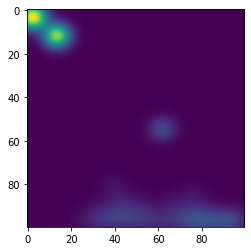

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/0cbec3fd5af7ae5fbd52c9628ce8b3b8.jpg", cv2.IMREAD_GRAYSCALE)
data = calculate(img,0)

plt.imshow(np.flip(np.reshape(data, [100,100]), 0))

In [ ]:
def calculateBC(input,label):
    # calcualte persistent homology
    ph = cripser.computePH(input,maxdim=1,location="birth")
    phs0_bd =np.array(ph[ph[:,0] == 0,1:3])
    phs1_bd =np.array(ph[ph[:,0] == 1,1:3])

    #clip persistent homology between o to 255
    phs0_bd=np.clip(phs0_bd,0,255)
    phs1_bd=np.clip(phs1_bd,0,255)

    # calculate bettu curve of persistent homology
    curves = representations.vector_methods.BettiCurve(256,sample_range = [0,255])
    BC0 = np.array(curves(phs0_bd))
    BC1 = np.array(curves(phs1_bd))

    #concatinatie the result return with the label
    return [label, np.concatenate([BC0, BC1],0)]
    # return [label, BC1]

In [ ]:
from google.colab import files
import skimage
from skimage import io
img = skimage.color.rgb2gray(io.imread(list(files.upload().keys())[0]))

Saving 0cbec3fd5af7ae5fbd52c9628ce8b3b8.jpg to 0cbec3fd5af7ae5fbd52c9628ce8b3b8.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


In [ ]:
import cripser
import gudhi
from gudhi import representations
import numpy as np
import math
import pandas as pad

In [ ]:
pd = cripser.computePH(img,maxdim=1,location="birth")
pds = [pd[pd[:,0] == i] for i in range(2)]
t = persim.plot_diagrams([p[:,1:3] for p in pds])
pds0 = [pd[pd[:,0] == i] for i in range(1)]
# print(pd[pd[:,0] == 0])print(pd[pd[:,0] == 0,1:3])
pds0_bd =np.array(pd[pd[:,0] == 0,1:3])
pds1_bd =np.array(pd[pd[:,0] == 1,1:3])

# print(clean_max(pds0_bd))
# persim.plot_diagrams(pds0_bd)
pds0_bd=np.clip(pds0_bd,0,255)
pds1_bd=np.clip(pds1_bd,0,255)
print(pds1_bd.shape)
# data = pad.DataFrame(pds0_bd)
# data.to_csv("test.csv")
# print(pds0_bd[pds0_bd[:,0]==np.inf])
# len(pds0[0][:,1:3])
# b d q
bdq=np.array(pd[:,[1,2,0]])
bdq=np.clip(bdq,0,255)
bdq[0]

curves = representations.vector_methods.BettiCurve(256,sample_range = [0,255])
result = curves(pds0_bd)
result1 = curves(pds1_bd)

In [ ]:
from glob import glob
import cv2
# SRC_DIR = os.path.join("full_data_segmented")
SRC_DIR = os.path.join("combined_segmented_cropped_modified_resized_512_subfolder/train")
# target_DIR = os.path.join("ph_full_data_segmented")

mild_src = glob(os.path.join(SRC_DIR,'mild', "*.jpg"))
moderate_src = glob(os.path.join(SRC_DIR,'moderate', "*.jpg"))
severe_src = glob(os.path.join(SRC_DIR,'severe', "*.jpg"))

# mild_trg = os.path.join(target_DIR,'mild')
# moderate_trg  = os.path.join(target_DIR,'moderate')
# severe_trg = os.path.join(target_DIR,'severe')

all_data= [];
all_labels = []
for src_file in mild_src:
  img = cv2.imread(src_file, cv2.IMREAD_GRAYSCALE)
  result = calculateBC(img,'mild')
  all_data.append(result[1])
  all_labels.append(result[0])
  # target_file =  os.path.join(mild_trg,src_file.split('/')[-1]).split('.')[0]+".npy"
  # np.save(target_file,result)
for src_file in moderate_src:
  img = cv2.imread(src_file, cv2.IMREAD_GRAYSCALE)
  result = calculateBC(img,'moderate')
  all_data.append(result[1])
  all_labels.append(result[0])
  # target_file =  os.path.join(moderate_trg,src_file.split('/')[-1]).split('.')[0]+".npy"
  # np.save(target_file,result)

for src_file in severe_src:
  img = cv2.imread(src_file, cv2.IMREAD_GRAYSCALE)
  result = calculateBC(img,'severe')
  all_data.append(result[1])
  all_labels.append(result[0])
  # target_file =  os.path.join(severe_trg,src_file.split('/')[-1]).split('.')[0]+".npy"
  # np.save(target_file,result)
all_data = np.array(all_data)
all_labels = np.array(all_labels)
np.save('ph_matrix_combined_segmented_cropped_modified_resized_512_data.npy',all_data)
np.save('ph_matrix_combined_segmented_cropped_modified_resized_512_label.npy',all_labels)


In [ ]:
loaded = np.load('ph_full_data_segmented')

In [ ]:
#find the max value for rescaling

len(all_data)
np.max(all_data)

7668.0